In [1]:
import tensorflow
import os
import pandas as pd
import librosa
import numpy as np
from scipy import signal
from scipy.io import wavfile
from tempfile import mktemp
import matplotlib.pyplot as plt
import librosa.display
from pydub import AudioSegment
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings('ignore')
import matplotlib
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import datetime

In [2]:
all_songs_dpath = '../data/wav_files/'
genres = os.listdir(all_songs_dpath)
genre_dirs = [all_songs_dpath+d + '/' for d in os.listdir(all_songs_dpath)]
genre_song_dict = {}
for genre, genre_path in zip(genres,genre_dirs):
    genre_song_dict[genre] = [genre_path+song for song in os.listdir(genre_path) ]
{k:len(v) for k,v in genre_song_dict.items()}

{'acoustic': 82,
 'alternative': 93,
 'blues': 88,
 'classical': 74,
 'country': 84,
 'dance': 92,
 'Electronic': 94,
 'hardcore': 50,
 'hip-hop': 76,
 'indie': 86,
 'jazz': 71,
 'Metal': 90,
 'punk': 91,
 'rap': 84,
 'reggae': 85,
 'rnb': 95,
 'rock': 93}

In [3]:
def generate_waveform(file, plot=True):
    
    sound = AudioSegment.from_file(file)
    wname = mktemp('.wav')
    sound.export(wname, format="wav") 
    FS, data = wavfile.read(wname)
    if plot:
        plt.figure(figsize=(15,5))
        duration  = len(data[:,0])/FS
        time = np.arange(0,duration,1/FS)
        if len(time) != len(data[:,0]):
            time = np.arange(0,duration - (1/FS),1/FS)
        plt.plot(time,data[:,0])
        plt.xlim(60,75)
    genre = file.split('/')[3]
    artist = file.split('/')[-1].split('.wav')[0].split('_')[0]
    song = file.split('/')[-1].split('.wav')[0].split('_')[1]
    single_chan_data = np.array(data[:,0],dtype = np.float32)
    song_dict = {'genre':genre,'sample_rate':FS, 'artist':artist, 'song_name':song, 'raw_data':single_chan_data}
    return song_dict 

In [4]:
dance_dict = generate_waveform(genre_song_dict['dance'][1], plot=False)
dance_dict

{'genre': 'dance',
 'sample_rate': 48000,
 'artist': 'Basshunter',
 'song_name': 'Boten Anna',
 'raw_data': array([    0.,     0.,     0., ..., 86291., 86234., 86177.], dtype=float32)}

In [5]:
acoustic_dict = generate_waveform(genre_song_dict['acoustic'][1], plot= False)
acoustic_dict

{'genre': 'acoustic',
 'sample_rate': 48000,
 'artist': 'Alexi Murdoch',
 'song_name': 'Song for You',
 'raw_data': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)}

In [6]:
metal_dict = generate_waveform(genre_song_dict['Metal'][1], plot= False)
metal_dict

{'genre': 'Metal',
 'sample_rate': 48000,
 'artist': 'Black Sabbath',
 'song_name': 'Paranoid',
 'raw_data': array([2964421., 3309600., 2462248., ...,  725428.,  847488.,   65454.],
       dtype=float32)}

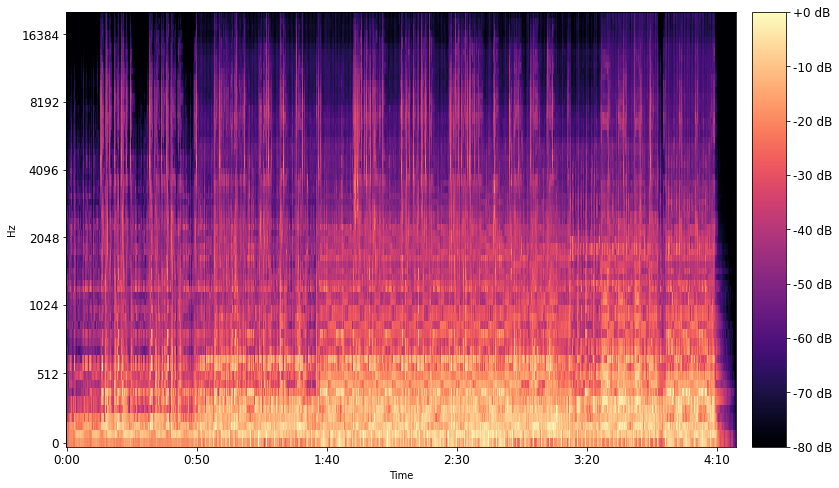

(64, 751)


In [7]:
n_acoustic = int(len(acoustic_dict['raw_data'])/(acoustic_dict['sample_rate']/64))


S = librosa.feature.melspectrogram(y=acoustic_dict['raw_data'], sr= acoustic_dict['sample_rate'],
                                   n_fft=n_acoustic,n_mels=64, win_length=n_acoustic,hop_length=n_acoustic, fmax=20000)
fig, ax = plt.subplots(figsize = (12,8))
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time', n_fft=n_acoustic,win_length=n_acoustic,hop_length=n_acoustic,
                         y_axis='mel', sr= metal_dict['sample_rate'],fmax=20000)
ax= plt.gca()
axins = inset_axes(ax,
                width="5%",  
                height="100%",
                loc='right',
                borderpad=-5
               )
cbar = fig.colorbar(img, cax=axins, format='%+2.0f dB',pad=0.2)
cbar.ax.tick_params(labelsize=12)
ax.tick_params(axis = 'both', labelsize = 12)
plt.show()
print(S.shape)

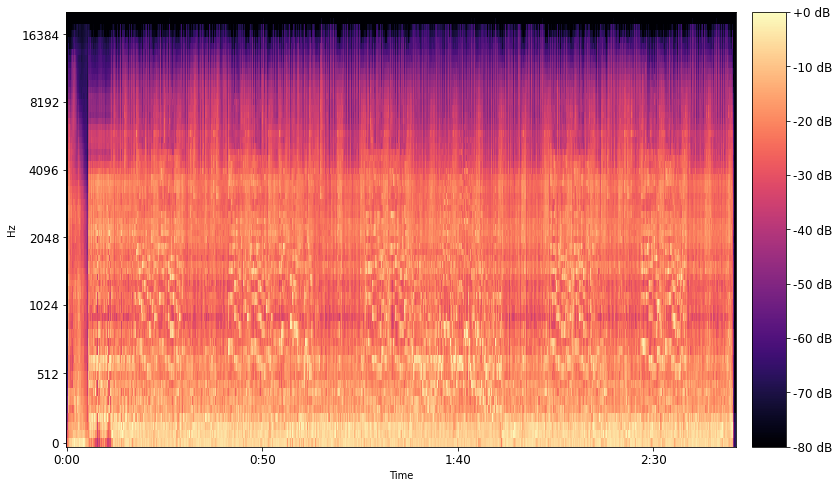

(64, 751)


In [8]:
n_metal = int(len(metal_dict['raw_data'])/(metal_dict['sample_rate']/64))

S = librosa.feature.melspectrogram(y=metal_dict['raw_data'], sr= metal_dict['sample_rate'],
                                   n_fft=n_metal,n_mels=64, win_length=n_metal,hop_length=n_metal)
fig, ax = plt.subplots(figsize = (12,8))
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time', n_fft=n_metal,win_length=n_metal,hop_length=n_metal,
                         y_axis='mel', sr= metal_dict['sample_rate'], fmax=20000)

axins = inset_axes(ax,
                width="5%",  
                height="100%",
                loc='right',
                borderpad=-5
               )
cbar = fig.colorbar(img, cax=axins, format='%+2.0f dB',pad=0.2)
cbar.ax.tick_params(labelsize=12)
ax.tick_params(axis = 'both', labelsize = 12)
plt.show()
print(S.shape)

In [9]:
def plot_mels(data, ax,fig):
    n_param = int(len(data['raw_data'])/(data['sample_rate']/64))
    S = librosa.feature.melspectrogram(y=data['raw_data'], sr= data['sample_rate'], n_fft=n_param,n_mels=64, 
                                       win_length=n_param,hop_length=n_param,fmax = 20000)

    S_dB = librosa.power_to_db(S, ref=np.max)
    img = librosa.display.specshow(S_dB, x_axis='time',n_fft=n_param,  win_length=n_param,hop_length=n_param,
                             y_axis='mel', sr= data['sample_rate'],fmax=20000, ax=ax)

    axins = inset_axes(ax, width="100%", height="10%",
                    loc='lower center', borderpad=-5)
    cbar = fig.colorbar(img, cax=axins, format='%+2.0f dB',pad=0.2,orientation="horizontal")
    cbar.ax.tick_params(labelsize=10)
    ax.tick_params(axis = 'both', labelsize = 10)
    return ax

In [30]:
def plot_spectrogram(data, ax, fig):
   
    FS = data['sample_rate']
    frequencies, times, spectrogram = signal.spectrogram(data['raw_data'],FS,nfft=2400,noverlap=0, 
                                                         nperseg=2400,mode='magnitude')

    fig = ax.pcolormesh(times, frequencies, 10*np.log10(spectrogram),  cmap='magma',vmin=0, vmax=80 , )
    ax.set_ylim(0,20000)

    def timeTicks(x, pos):
        d = datetime.timedelta(seconds=x).seconds
        hours, remainder = divmod(x, 3600)
        minutes, seconds = divmod(remainder, 60)
        return('{:02}:{:02}'.format(int(minutes), int(seconds)))
    formatter = matplotlib.ticker.FuncFormatter(timeTicks)
    ax.xaxis.set_major_formatter(formatter)
    ax.tick_params(axis = 'both', labelsize = 10)

In [33]:
def plot_waveform(data,ax):
    FS = data['sample_rate']
    duration  = len(data['raw_data'])/FS
    time = np.arange(0,duration,1/FS)
    if len(time) != len(data['raw_data']):
        time = np.arange(0,duration - (1/FS),1/FS)
    ax.plot(time,data['raw_data'])
    ax.set_ylabel('Amplitude', fontsize = 12)
    
    def timeTicks(x, pos):
        d = datetime.timedelta(seconds=x).seconds
        hours, remainder = divmod(x, 3600)
        minutes, seconds = divmod(remainder, 60)
        return('{:02}:{:02}'.format(int(minutes), int(seconds)))
    formatter = matplotlib.ticker.FuncFormatter(timeTicks)
    ax.xaxis.set_major_formatter(formatter)
    ax.tick_params(axis = 'both', labelsize = 10)
    return ax

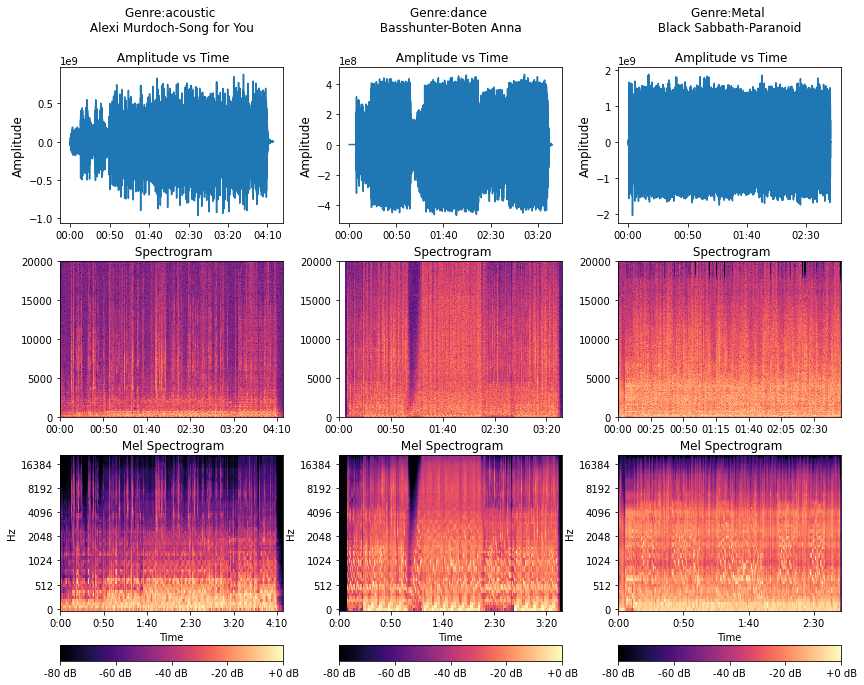

In [34]:
fig = plt.figure(figsize=(14, 10))
ncols = 3
nrows = int(np.ceil(len(genre_song_dict.keys())/3))
outer = gridspec.GridSpec(1, ncols, wspace=0.25, hspace=1)
song_data = [acoustic_dict, dance_dict, metal_dict]
for i, data in zip(range(3), song_data):
    inner = gridspec.GridSpecFromSubplotSpec(3, 1,
                    subplot_spec=outer[i], wspace=0.25, hspace=0.25)
    
    ax = plt.Subplot(fig, inner[0])
    plot_waveform(data, ax)
    ax.set_title('Genre:{0} \n {1}-{2} \n\n Amplitude vs Time'.format(data['genre'], data['artist'],data['song_name']))
    fig.add_subplot(ax)

    ax = plt.Subplot(fig, inner[1])
    plot_spectrogram(data, ax, fig)
    ax.set_title('\n Spectrogram')
    fig.add_subplot(ax)

    ax = plt.Subplot(fig, inner[2])
    plot_mels(data, ax,fig)
    ax.set_title('\n Mel Spectrogram')
    fig.add_subplot(ax)

plt.savefig('../data/images/genre_spectrograms.jpg', dpi= 300, format= 'jpg')
plt.show()